In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests

In [2]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0   -0.069167
1    0.172852
2    1.081592
3   -0.252862
Name: daily returns, dtype: float64

In [3]:
s * 100

0     -6.916670
1     17.285217
2    108.159192
3    -25.286155
Name: daily returns, dtype: float64

In [4]:
np.abs(s)

0    0.069167
1    0.172852
2    1.081592
3    0.252862
Name: daily returns, dtype: float64

In [5]:
s.describe()

count    4.000000
mean     0.233104
std      0.591916
min     -0.252862
25%     -0.115090
50%      0.051843
75%      0.400037
max      1.081592
Name: daily returns, dtype: float64

In [6]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN   -0.069167
AAPL    0.172852
MSFT    1.081592
GOOG   -0.252862
Name: daily returns, dtype: float64

In [7]:
s['AMZN']

-0.06916669547028961

In [8]:
s['AMZN'] = 0
s

AMZN    0.000000
AAPL    0.172852
MSFT    1.081592
GOOG   -0.252862
Name: daily returns, dtype: float64

In [9]:
'AAPL' in s

True

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-python-programming/master/source/_static/lecture_specific/pandas/data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [11]:
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [12]:
df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


In [13]:
df[['country', 'tcgdp']]

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


In [14]:
df.iloc[2:5, 0:4]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


In [15]:
df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


In [16]:
df[df.POP >= 20000]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.99950,2.950722e+05,75.716805,5.578804
2,India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
5,South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.00000,9.898700e+06,72.347054,6.032454


In [17]:
df.POP >= 20000

0     True
1    False
2     True
3    False
4    False
5     True
6     True
7    False
Name: POP, dtype: bool

In [18]:
df[(df.country.isin(['Argentina', 'India', 'South Africa'])) & (df.POP > 40000)]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
5,South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546


In [19]:
# the above is equivalent to 
df.query("POP >= 20000")

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.99950,2.950722e+05,75.716805,5.578804
2,India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
5,South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.00000,9.898700e+06,72.347054,6.032454


In [20]:
df.query("country in ['Argentina', 'India', 'South Africa'] and POP > 40000")

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206
5,South Africa,ZAF,2000,45064.098,6.93983,2.272424e+05,72.718710,5.726546


In [21]:
df[(df.cc + df.cg >= 80) & (df.POP <= 20000)]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
4,Malawi,MWI,2000,11801.505,59.543808,5026.221784,74.707624,11.658954
7,Uruguay,URY,2000,3219.793,12.099592,25255.961693,78.978740,5.108068


In [22]:
# the above is equivalent to 
df.query("cc + cg >= 80 & POP <= 20000")

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
4,Malawi,MWI,2000,11801.505,59.543808,5026.221784,74.707624,11.658954
7,Uruguay,URY,2000,3219.793,12.099592,25255.961693,78.978740,5.108068


In [23]:
df.loc[df.cc == max(df.cc)]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
7,Uruguay,URY,2000,3219.793,12.099592,25255.961693,78.97874,5.108068


In [24]:
df.loc[(df.cc + df.cg >= 80) & (df.POP <= 20000), ['country', 'year', 'POP']]

,country,year,POP
4,Malawi,2000,11801.505
7,Uruguay,2000,3219.793


In [25]:
df_subset = df[['country', 'POP', 'tcgdp']]
df_subset

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


In [26]:
df[['year', 'POP', 'XRAT', 'tcgdp', 'cc', 'cg']].apply(max)

year     2.000000e+03
POP      1.006300e+06
XRAT     5.954381e+01
tcgdp    9.898700e+06
cc       7.897874e+01
cg       1.407221e+01
dtype: float64

In [27]:
df.apply(lambda row: row, axis=1)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [28]:
complexCondition = df.apply(
    lambda row: row.POP > 40000 if row.country in ['Argentina', 'India', 'South Africa'] else row.POP < 20000, 
    axis=1), ['country', 'year', 'POP', 'XRAT', 'tcgdp']

In [29]:
complexCondition

(0    False
 1     True
 2     True
 3     True
 4     True
 5     True
 6    False
 7     True
 dtype: bool,
 ['country', 'year', 'POP', 'XRAT', 'tcgdp'])

In [30]:
df.loc[complexCondition]

,country,year,POP,XRAT,tcgdp
1,Australia,2000,19053.186,1.724830,5.418047e+05
2,India,2000,1006300.297,44.941600,1.728144e+06
3,Israel,2000,6114.570,4.077330,1.292539e+05
4,Malawi,2000,11801.505,59.543808,5.026222e+03
5,South Africa,2000,45064.098,6.939830,2.272424e+05
7,Uruguay,2000,3219.793,12.099592,2.525596e+04


In [31]:
df.where(df.POP >= 20000, False)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.9995,295072.21869,75.716805,5.578804
1,False,False,False,False,False,False,False,False
2,India,IND,2000,1006300.297,44.9416,1728144.3748,64.575551,14.072206
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,South Africa,ZAF,2000,45064.098,6.93983,227242.36949,72.71871,5.726546
6,United States,USA,2000,282171.957,1.0,9898700.0,72.347054,6.032454
7,False,False,False,False,False,False,False,False


In [32]:
df.loc[df.cg == max(df.cg), 'cg'] = np.nan
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,NaN
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [33]:
def update_row(row):
    # modify POP
    row.POP = np.nan if row.POP<= 10000 else row.POP

    # modify XRAT
    row.XRAT = row.XRAT / 10
    return row

df.apply(update_row, axis=1)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.099950,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,0.172483,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,4.494160,1.728144e+06,64.575551,NaN
3,Israel,ISR,2000,NaN,0.407733,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,5.954381,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,0.693983,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,0.100000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,NaN,1.209959,2.525596e+04,78.978740,5.108068


In [34]:
# Round all decimal numbers to 2 decimal places
df.applymap(lambda x : round(x,2) if type(x)!=str else x)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.65,1.00,295072.22,75.72,5.58
1,Australia,AUS,2000,19053.19,1.72,541804.65,67.76,6.72
2,India,IND,2000,1006300.30,44.94,1728144.37,64.58,NaN
3,Israel,ISR,2000,6114.57,4.08,129253.89,64.44,10.27
4,Malawi,MWI,2000,11801.50,59.54,5026.22,74.71,11.66
5,South Africa,ZAF,2000,45064.10,6.94,227242.37,72.72,5.73
6,United States,USA,2000,282171.96,1.00,9898700.00,72.35,6.03
7,Uruguay,URY,2000,3219.79,12.10,25255.96,78.98,5.11


In [35]:
for idx in list(zip([0, 3, 5, 6], [3, 4, 6, 2])):
    df.iloc[idx] = np.nan

df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000.0,NaN,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000.0,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000.0,1006300.297,44.941600,1.728144e+06,64.575551,NaN
3,Israel,ISR,2000.0,6114.570,NaN,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000.0,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000.0,45064.098,6.939830,2.272424e+05,NaN,5.726546
6,United States,USA,NaN,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000.0,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [36]:
# replace all NaN values by 0
def replace_nan(x):
    if type(x)!=str:
        return  0 if np.isnan(x) else x
    else:
        return x

df.applymap(replace_nan)

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000.0,0.000,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000.0,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000.0,1006300.297,44.941600,1.728144e+06,64.575551,0.000000
3,Israel,ISR,2000.0,6114.570,0.000000,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000.0,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000.0,45064.098,6.939830,2.272424e+05,0.000000,5.726546
6,United States,USA,0.0,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000.0,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [37]:
df = df.fillna(df.iloc[:,2:8].mean())
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000.0,1.962465e+05,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000.0,1.905319e+04,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000.0,1.006300e+06,44.941600,1.728144e+06,64.575551,7.298802
3,Israel,ISR,2000.0,6.114570e+03,18.178451,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000.0,1.180150e+04,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000.0,4.506410e+04,6.939830,2.272424e+05,71.217322,5.726546
6,United States,USA,2000.0,2.821720e+05,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000.0,3.219793e+03,12.099592,2.525596e+04,78.978740,5.108068


In [38]:
df = df[['country', 'POP', 'tcgdp']]
df

,country,POP,tcgdp
0,Argentina,1.962465e+05,2.950722e+05
1,Australia,1.905319e+04,5.418047e+05
2,India,1.006300e+06,1.728144e+06
3,Israel,6.114570e+03,1.292539e+05
4,Malawi,1.180150e+04,5.026222e+03
5,South Africa,4.506410e+04,2.272424e+05
6,United States,2.821720e+05,9.898700e+06
7,Uruguay,3.219793e+03,2.525596e+04


In [39]:
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,1.962465e+05,2.950722e+05
Australia,1.905319e+04,5.418047e+05
India,1.006300e+06,1.728144e+06
Israel,6.114570e+03,1.292539e+05
Malawi,1.180150e+04,5.026222e+03
South Africa,4.506410e+04,2.272424e+05
United States,2.821720e+05,9.898700e+06
Uruguay,3.219793e+03,2.525596e+04


In [40]:
df.columns = 'population', 'total GDP'
df

,population,total GDP
country,,
Argentina,1.962465e+05,2.950722e+05
Australia,1.905319e+04,5.418047e+05
India,1.006300e+06,1.728144e+06
Israel,6.114570e+03,1.292539e+05
Malawi,1.180150e+04,5.026222e+03
South Africa,4.506410e+04,2.272424e+05
United States,2.821720e+05,9.898700e+06
Uruguay,3.219793e+03,2.525596e+04


In [41]:
df['population'] = df['population'] * 1e3
df

,population,total GDP
country,,
Argentina,1.962465e+08,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


In [42]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df

,population,total GDP,GDP percap
country,,,
Argentina,1.962465e+08,2.950722e+05,1503.579625
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


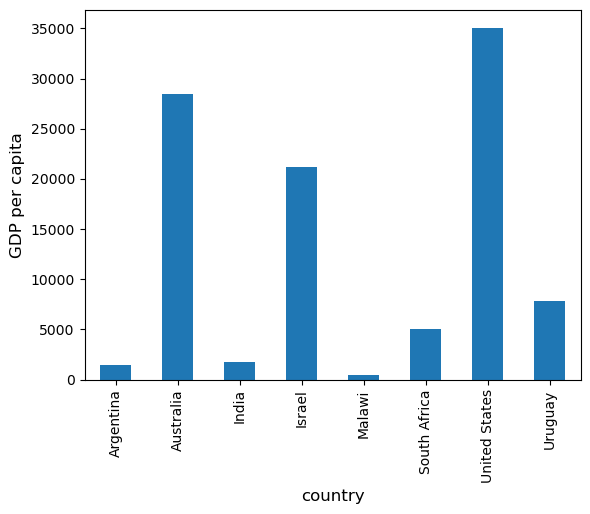

In [43]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

In [44]:
df = df.sort_values(by='GDP percap', ascending=False)
df

,population,total GDP,GDP percap
country,,,
United States,2.821720e+08,9.898700e+06,35080.381854
Australia,1.905319e+07,5.418047e+05,28436.433261
Israel,6.114570e+06,1.292539e+05,21138.672749
Uruguay,3.219793e+06,2.525596e+04,7843.970620
South Africa,4.506410e+07,2.272424e+05,5042.647686
India,1.006300e+09,1.728144e+06,1717.324719
Argentina,1.962465e+08,2.950722e+05,1503.579625
Malawi,1.180150e+07,5.026222e+03,425.896679


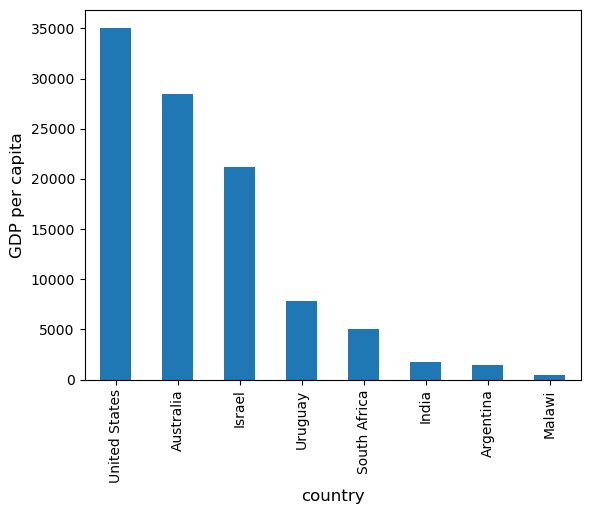

In [45]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

In [46]:
r = requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')

In [47]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split("\n")
source[0]

'DATE,VALUE\r'

In [48]:
source[1]

'1948-01-01,3.4\r'

In [49]:
source[2]

'1948-02-01,3.8\r'

In [50]:
data = pd.read_csv(url, index_col=0, parse_dates=True)

In [51]:
type(data)

pandas.core.frame.DataFrame

In [52]:
data.head()  # A useful method to get a quick look at a data frame

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [53]:
pd.set_option('display.precision', 1)
data.describe()  # Your output might differ slightly

,VALUE
count,918.0
mean,5.7
std,1.7
min,2.5
25%,4.4
50%,5.5
75%,6.7
max,14.8


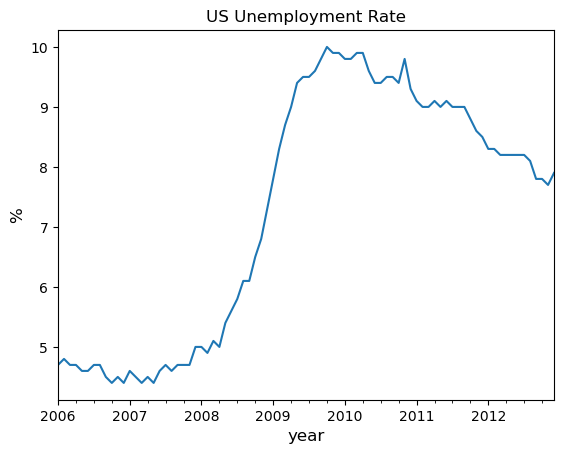

In [54]:
ax = data['2006':'2012'].plot(title='US Unemployment Rate', legend=False)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()